# Ciencia de los datos

Los datos nos proporcionan respuestas a través de valores ocultos y patrones. Al ser muchos los datos que nos rodean, se aplican métodos de análisis masivos para extraer conocimiento de ellos.

- Análisis de texto: Comprende el proceso automatizado de clasificar información de un texto. Un ejemplo es el análisis de sentimientos, extracción de palabras clabes y detección de temas.
- Análisis estadístico: Mediante el uso de estadísticas, es posible agrupar y organizar los datos, para luego realizar inferencias. Por ejemplo, analizar el flujo de personas que frecuentan una sala de urgencias en un periodo de tiempo.
- Análisis de diagnóstico: En este proceso se examinan los datos y se busca identificar la razón por la cual sucedio un evento particular. A través de este análisis se puede determinar la correlación de las variables que afectan a un fenomeno.
- Análisis predictivo: En esste proceso se trabaja con datos históricos para encontrar patrones y poder predecir efectos similares a futuro.
- Análisis prescriptivo: Se sugieren acciones ante la situación detectada.

Incluye procesos como:

- Recopilación de los datosn
- Limpieza
- Procesamiento
- Visualización

Los conjuntos de datos estan casi siempre en formatos como:

- CSV (Comma Separated Value)
- Excel
- JSON (JavaScript Object Notation)

## Taller Regresión Lineal

Realizar la descarga de los datos que se encuentran en [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) con el nombre de Bike Sharing Dataset Data Set.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import warnings

In [2]:
from sklearn.linear_model import LinearRegression

In [70]:
from sklearn.model_selection import train_test_split

### Dataset `Bike-Sharing/day.csv`

In [63]:
day = pd.read_csv("Datasets/Bike-Sharing/day.csv", encoding='utf-8')

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day.apply(lambda x : len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [15]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [64]:
day = day.rename(columns= {
    'weathersit' : 'weather',
    'yr' : 'year',
    'mnth' : 'month',
    'hum' : 'humidity',
    'cnt' : 'count'
})

In [21]:
day.columns.values

array(['instant', 'dteday', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'], dtype=object)

In [65]:
day.drop(columns=['instant', 'dteday', 'year'], inplace=True)

In [66]:
day.columns.values

array(['season', 'month', 'holiday', 'weekday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'], dtype=object)

[Text(0.5, 1.0, 'Count of bikes durign different weekdays')]

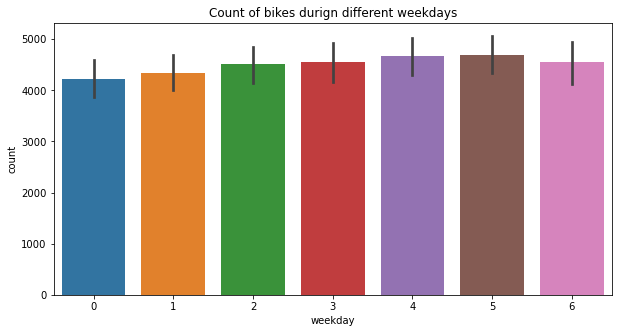

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=day, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes durign different weekdays')

[Text(0.5, 1.0, 'Count of bikes durign different mounths')]

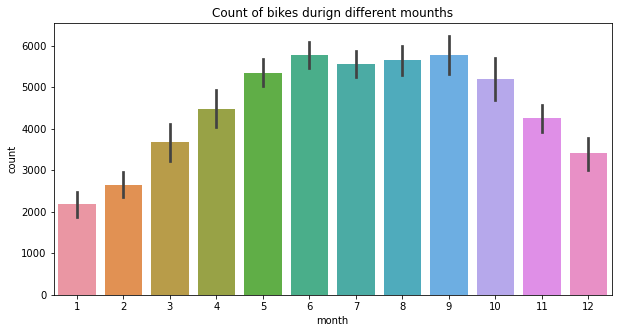

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=day, x='month', y='count', ax=ax)
ax.set(title='Count of bikes durign different mounths')

[Text(0.5, 1.0, 'Count of bikes durign different mounths')]

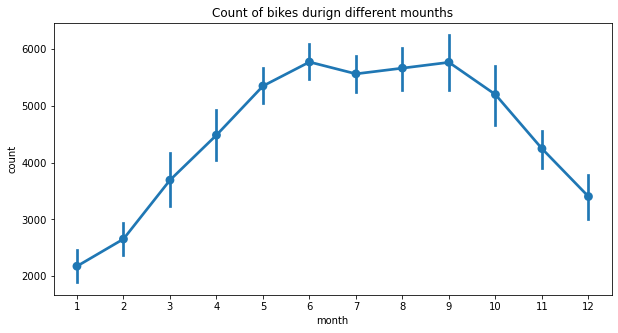

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=day, x='month', y='count', ax=ax)
ax.set(title='Count of bikes durign different mounths')

<AxesSubplot:xlabel='month', ylabel='count'>

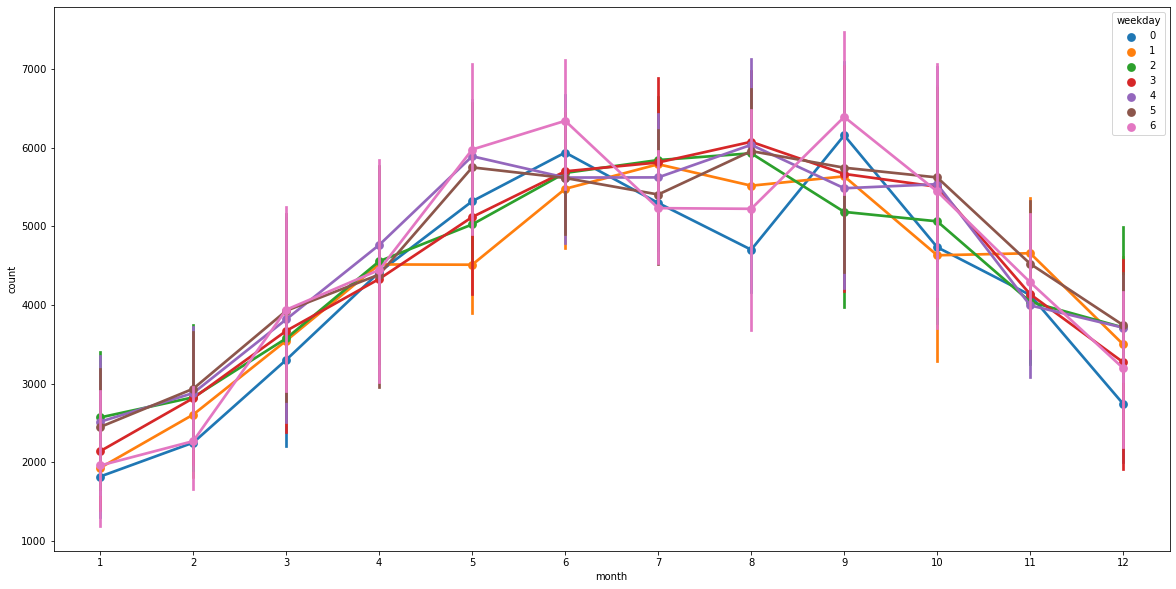

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=day, x='month', y='count', hue='weekday', ax=ax)

<AxesSubplot:xlabel='month', ylabel='count'>

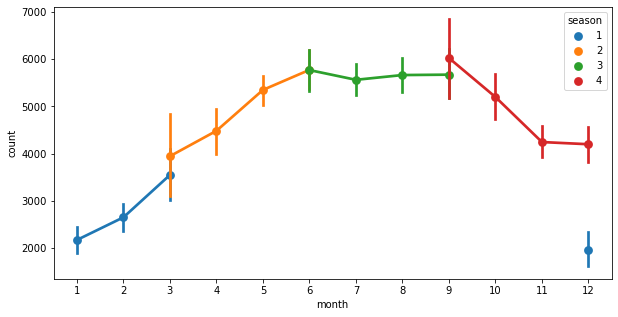

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=day, x='month', y='count', hue='season', ax=ax)

<AxesSubplot:xlabel='month', ylabel='casual'>

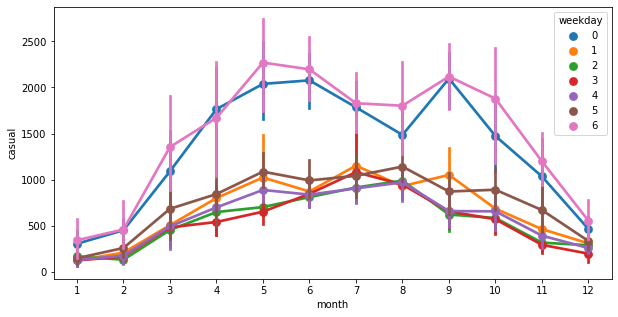

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=day, x='month', y='casual', hue='weekday', ax=ax)

[Text(0.5, 1.0, 'Count of bikes during differenr weathers')]

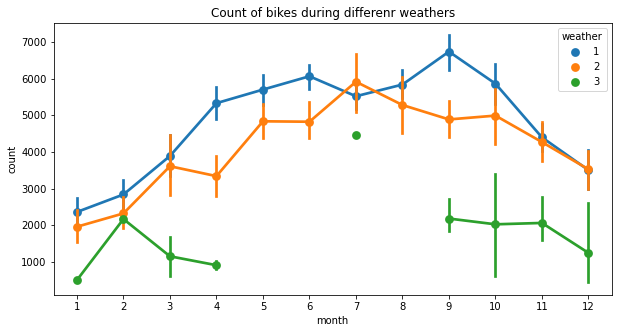

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=day, x='month', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during differenr weathers')

[Text(0.5, 1.0, 'Relation between humidity and users')]

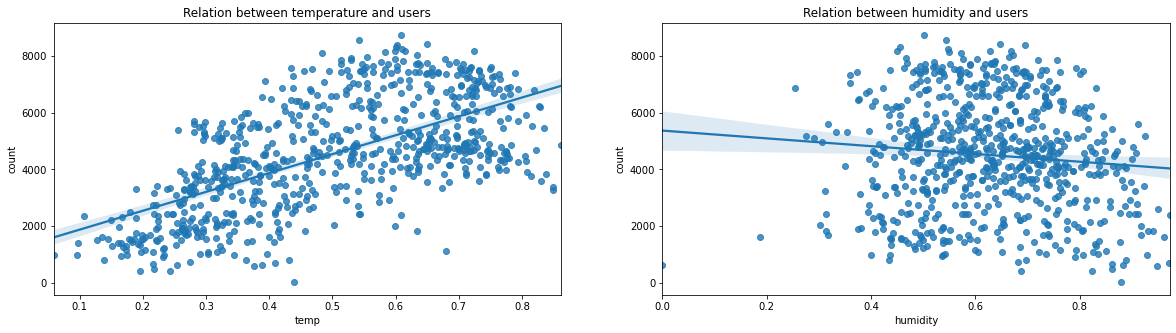

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
sns.regplot(data=day, x='temp', y='count', ax=ax1)
ax1.set(title='Relation between temperature and users')
sns.regplot(data=day, x='humidity', y='count', ax=ax2)
ax2.set(title='Relation between humidity and users')

[Text(0.5, 1.0, 'Relation between humidity and users')]

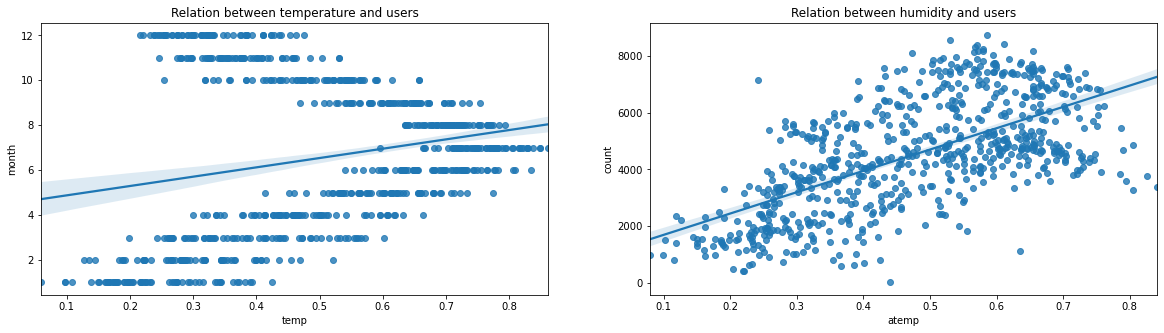

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
sns.regplot(data=day, x='temp', y='month', ax=ax1)
ax1.set(title='Relation between temperature and month')
sns.regplot(data=day, x='atemp', y='count', ax=ax2)
ax2.set(title='Relation between atemp and users')

[Text(0.5, 1.0, 'Relation between humidity and users')]

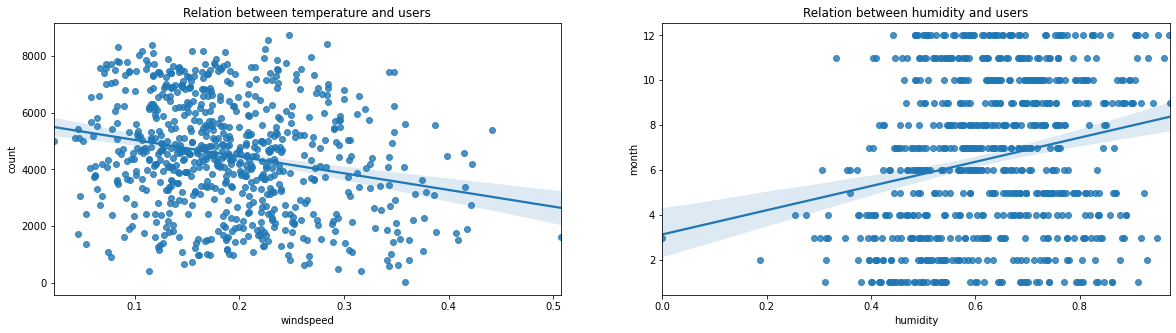

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
sns.regplot(data=day, x='windspeed', y='count', ax=ax1)
ax1.set(title='Relation between windspedd and users')
sns.regplot(data=day, x='humidity', y='month', ax=ax2)
ax2.set(title='Relation between humidity and month')

<AxesSubplot:>

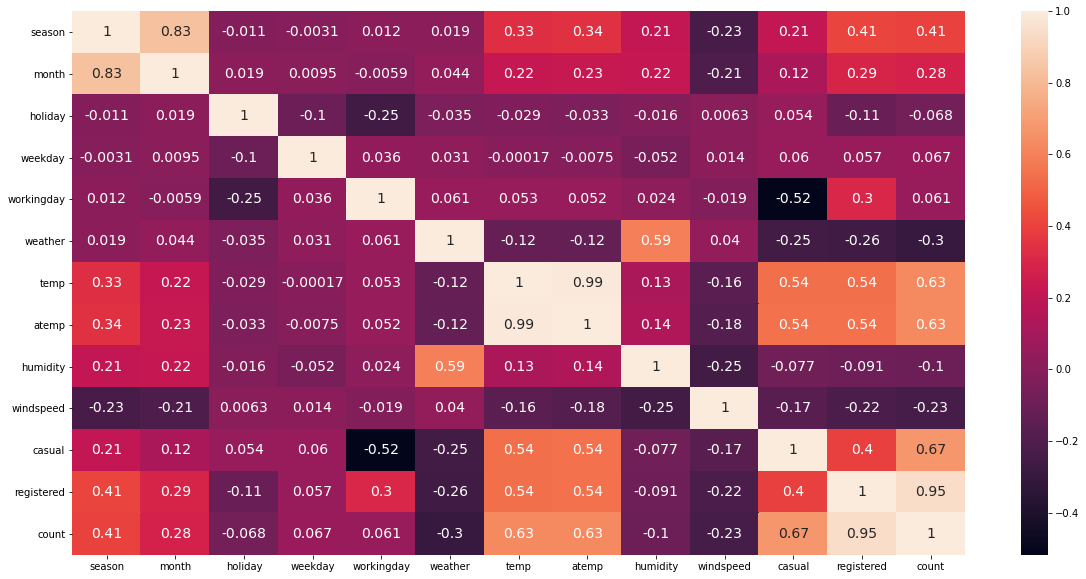

In [67]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(day.corr(), annot=True, annot_kws={'size': 14}, cbar=True)

In [68]:
cols = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for col in cols:
    day[col] = day[col].astype('category')
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   month       731 non-null    category
 2   holiday     731 non-null    category
 3   weekday     731 non-null    category
 4   workingday  731 non-null    category
 5   weather     731 non-null    category
 6   temp        731 non-null    float64 
 7   atemp       731 non-null    float64 
 8   humidity    731 non-null    float64 
 9   windspeed   731 non-null    float64 
 10  casual      731 non-null    int64   
 11  registered  731 non-null    int64   
 12  count       731 non-null    int64   
dtypes: category(6), float64(4), int64(3)
memory usage: 45.7 KB


<AxesSubplot:>

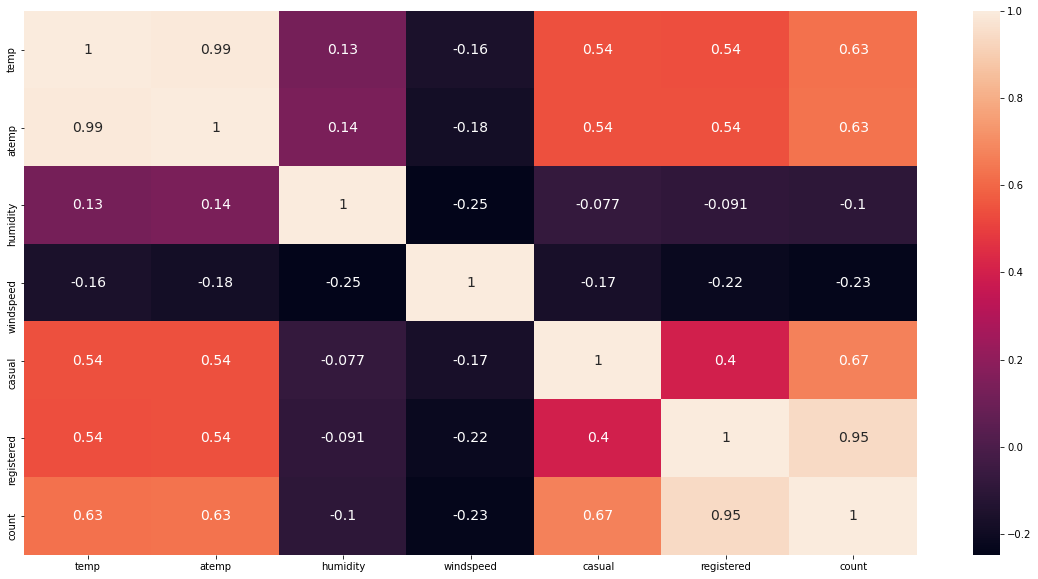

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(day.corr(), annot=True, annot_kws={'size': 14}, cbar=True)

In [112]:
day = pd.read_csv("Datasets/Bike-Sharing/day.csv", encoding='utf-8')

day = day.rename(columns= {
    'weathersit' : 'weather',
    'yr' : 'year',
    'mnth' : 'month',
    'hum' : 'humidity',
    'cnt' : 'count'
})

In [113]:
x_label = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

x = day[x_label].values
y = day['count'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [114]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [115]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [116]:
pred = lr.predict(x_test)

In [117]:
print("Score predict train", r2_score(y_train, lr.predict(x_train)))
print("Score predict test", r2_score(y_test, lr.predict(x_test)))

Score predict train 0.5163477815237139
Score predict test 0.5626479717782272


In [118]:
print('Porcentaje de Acertabilidad para Test', str(lr.score(x_test, y_test)*100), '%')
print('Porcentaje de Acertabilidad para Train', str(lr.score(x_train, y_train)*100), '%')

Porcentaje de Acertabilidad para Test 56.26479717782272 %
Porcentaje de Acertabilidad para Train 51.63477815237138 %


In [119]:
print('Promedio error cuadratico', str(mean_squared_error(y_test, pred)*100))

Promedio error cuadratico 175373015.18425402


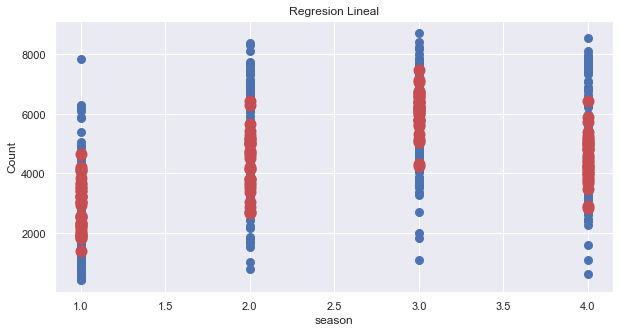

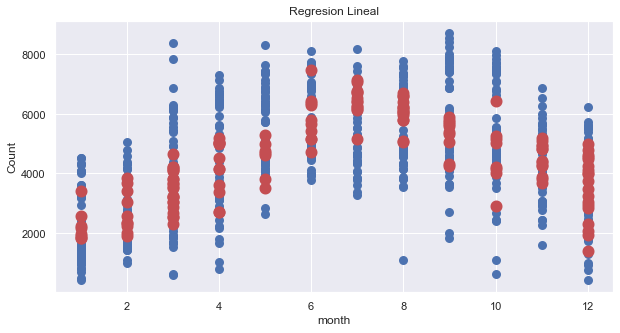

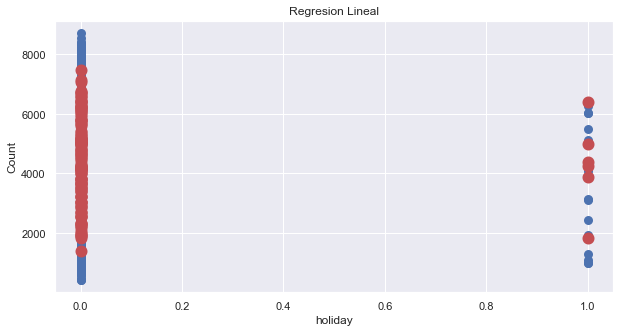

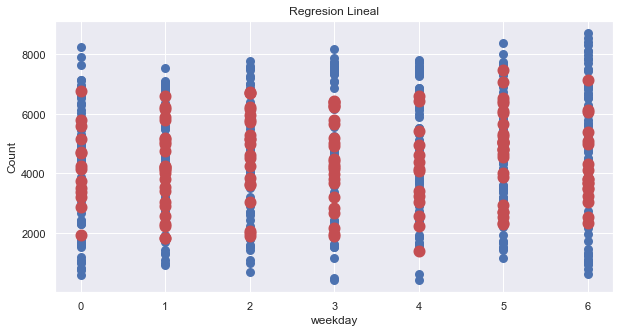

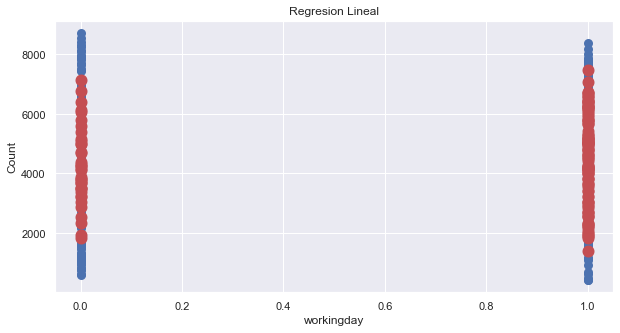

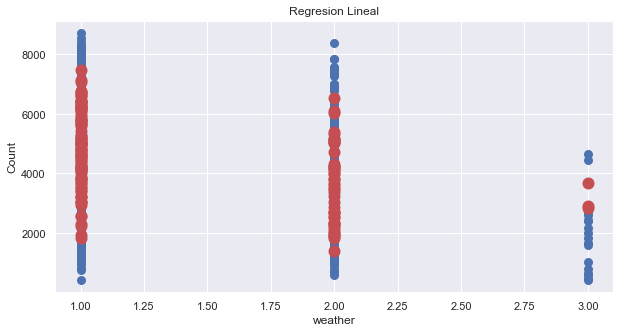

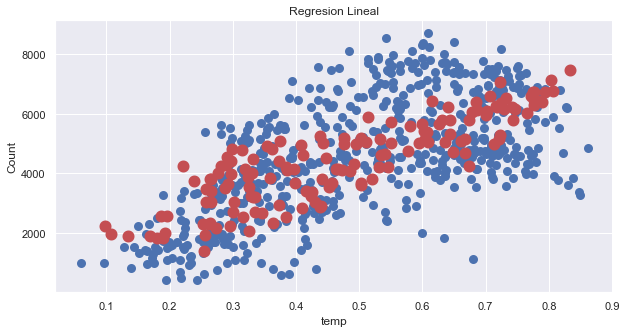

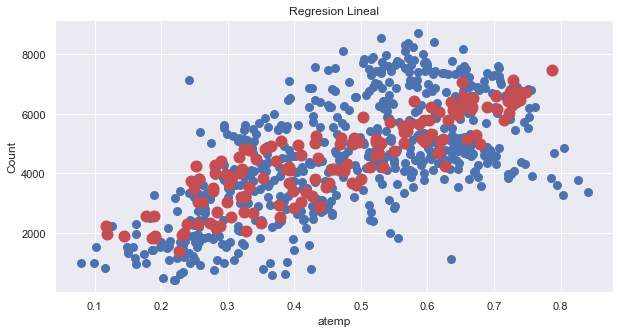

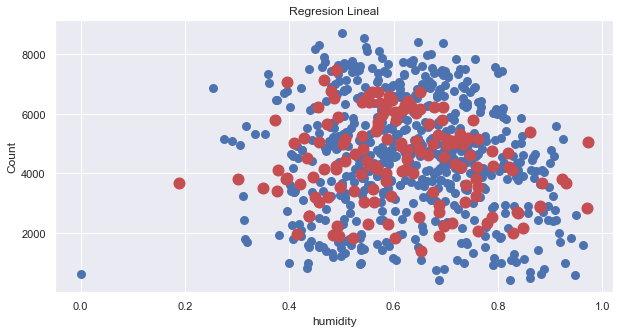

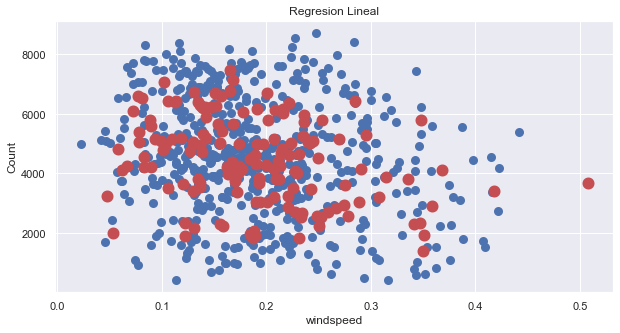

In [120]:
for i in range(len(x_label)):
    plt.subplots(figsize=(10, 5))
    plt.scatter(x_train[:,i], y_train, color='b', linewidth=3)
    plt.scatter(x_test[:,i], pred, color='r', linewidth=6)
    plt.title('Regresion Lineal')
    plt.xlabel(f'{x_label[i]}')
    plt.ylabel('Count')
    plt.show()
